# infoSIsaR

base of tth data https://github.com/pcm-dpc/COVID-19

definitions https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md#dati-per-regione

In [1]:
area='Piemonte'
# area names: Abruzzo | Basilicata | Calabria | Campania | Emilia-Romagna | 
#             Friuli Venezia Giulia |  Lazio | Liguria | Lombardia | Marche | 
#             Molise | P.A. Bolzano | P.A. Trento | Piemonte | Puglia | Sardegna | 
#             Sicilia | Toscana | Umbria | Valle d'Aosta | Veneto

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def parse_date(date):
    return datetime.strptime(date[:10], '%Y-%m-%d')

regional_data = pd.read_csv(
    'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv',
    parse_dates=['data'],
    date_parser=parse_date)

area_data=regional_data[regional_data.denominazione_regione==area]
area_data=area_data.rename(columns = {'data': 'dates'},inplace = False)

relevant_columns=['dates','ricoverati_con_sintomi','terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati'];
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
colorDict={'ricoverati_con_sintomi':'lightgray', 'terapia_intensiva':'darkgray',
           'totale_ospedalizzati':'dimgray', 'isolamento_domiciliare':'brown', 
           'totale_positivi':'red','variazione_totale_positivi':' orange', 
           'nuovi_positivi':'olive', 'dimessi_guariti':'yellowgreen','deceduti':'black',
           'casi_da_sospetto_diagnostico':'fuchsia', 'casi_da_screening':'darkviolet',
           'totale_casi':'blue', 'tamponi':'green', 'casi_testati':'lime',
           'totale_positivi_corr':'red','totale_casi_corr':'blue',
           'casi_da_screening_diff14days':'deeppink'}
area_data.columns

Index(['dates', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido', 'codice_nuts_1', 'codice_nuts_2'],
      dtype='object')

In [3]:
import numpy as np # replacing 0 values with nan from 20201203 in the cols below
area_data['casi_da_sospetto_diagnostico'].replace(0,np.nan,inplace=True)
area_data['casi_da_screening'].replace(0,np.nan,inplace=True)

In [4]:
area_data['zero']=0

<br/>

# Trying to make the data comparable  
  
The data in Figure 1 are the published data, certainly correct ones, but quite problematic if we want to compare the current situation to April. The data in Figure 1 are the published data, undoubtedly correct, but quite complicated if we compare the current situation and April.  
  
In Fig. 1, we introduce 'casi_da_screening_diff14days' as an approximation of the quarantine simultaneously present cases.  

We can consistently correct the cumulative values of 'totale_casi' subtracting 'casi_da_screening', another cumulative value.

Nota Bene  
The results are not significant for all the regions.

In [5]:
area_data['totale_casi_corr']=area_data['totale_casi'] - \
                                  area_data['casi_da_screening']

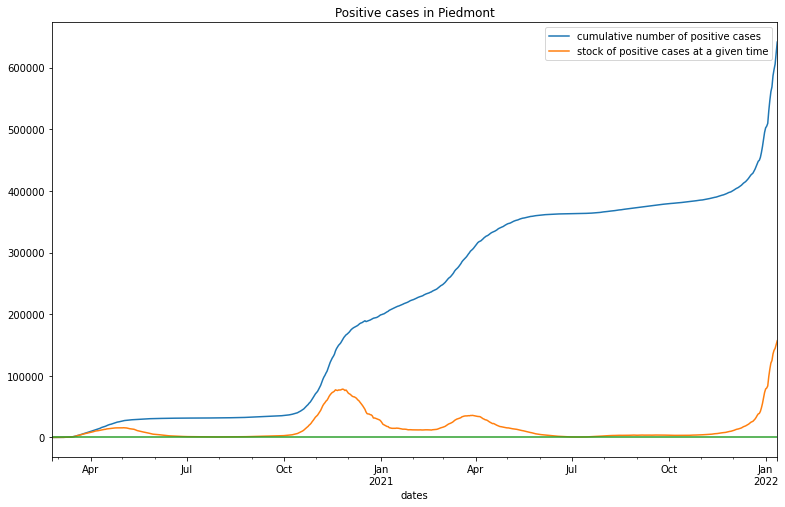

In [6]:
plt.rcParams['figure.figsize'] = [13, 8]
fig=area_data.plot.line(x='dates',    y=['totale_casi',
                                         'totale_positivi','zero'],
                    title='Positive cases in Piedmont')#,
                    #color=colorDict, lw=1,style=["-","-"]);
fig.legend(["cumulative number of positive cases",
            "stock of positive cases at a given time"]);

In [7]:
picture = fig.get_figure()

In [8]:
picture.savefig("/Users/pt/Desktop/andamento900.jpg",dpi=80)

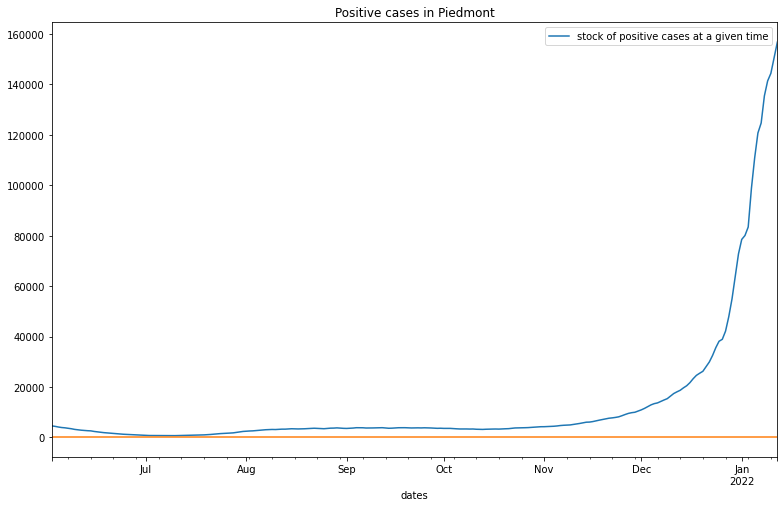

In [9]:
plt.rcParams['figure.figsize'] = [13, 8]
fig=area_data[(area_data.dates > "2021-06-01") ].plot.line(x='dates',    y=[
                                         'totale_positivi','zero'],
                    title='Positive cases in Piedmont')#,
                    #color=colorDict, lw=1,style=["-","-"]);
fig.legend(
           ["stock of positive cases at a given time"]);

In [10]:
area_data[(area_data.dates > "2021-06-01") & (area_data.dates<"2022-01-01")][['dates','totale_casi','totale_positivi']]

,dates,totale_casi,totale_positivi
9757,2021-06-02,360673,4563
9778,2021-06-03,360892,4386
9799,2021-06-04,361083,4129
9820,2021-06-05,361272,3928
9841,2021-06-06,361401,3813
...,...,...,...
14125,2021-12-27,454149,42151
14146,2021-12-28,462082,47896
14167,2021-12-29,471753,54953
14188,2021-12-30,483268,63886
